In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Question 1

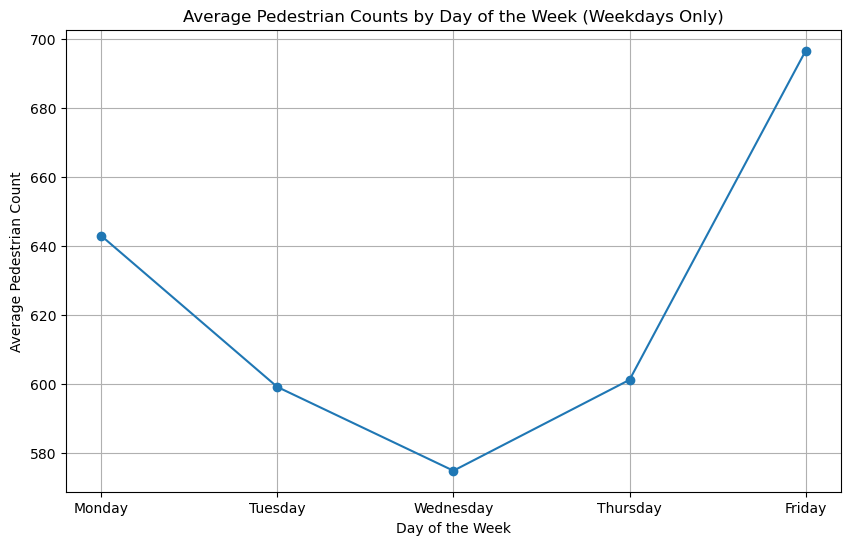

In [3]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['weekday'] = df['hour_beginning'].dt.weekday
weekday_data = df[df['weekday'] < 5]
weekday_avg_pedestrians = weekday_data.groupby('weekday')['Pedestrians'].mean()

plt.figure(figsize=(10, 6))
plt.plot(weekday_avg_pedestrians.index, weekday_avg_pedestrians.values, marker='o', linestyle='-')
plt.title('Average Pedestrian Counts by Day of the Week (Weekdays Only)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Count')
plt.xticks(weekday_avg_pedestrians.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.grid(True)
plt.show()

# Question 2

In [4]:
df['year'] = df['hour_beginning'].dt.year
data_2019 = df[df['year'] == 2019]
weather_pedestrians_2019 = data_2019.groupby('weather_summary')['Pedestrians'].mean().sort_values()
weather_data_2019 = data_2019[['Pedestrians', 'temperature', 'precipitation']]
correlation_matrix = weather_data_2019.corr()
correlation_matrix

,Pedestrians,temperature,precipitation
Pedestrians,1.000000,0.358757,-0.105432
temperature,0.358757,1.000000,0.001911
precipitation,-0.105432,0.001911,1.000000


# Question 3

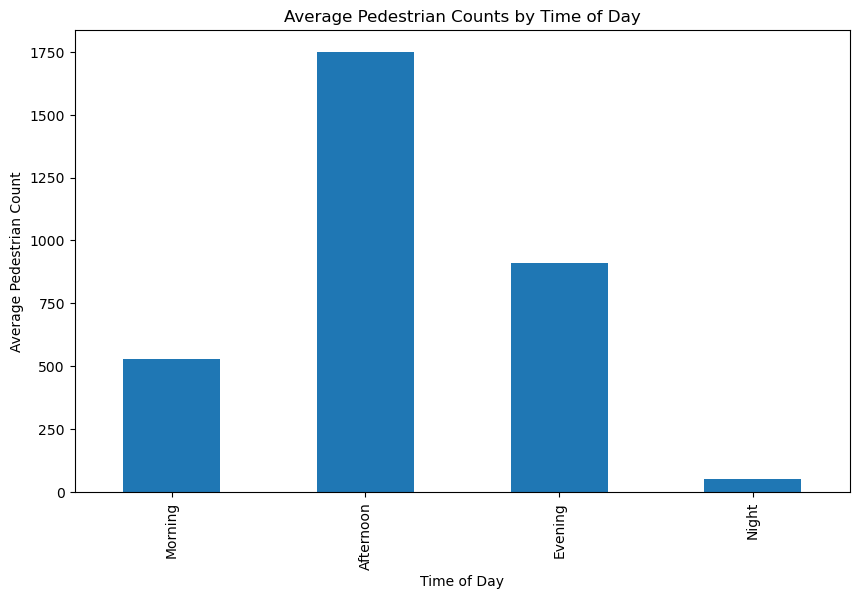

In [5]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)
time_of_day_pedestrians = df.groupby('time_of_day')['Pedestrians'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

plt.figure(figsize=(10, 6))
time_of_day_pedestrians.plot(kind='bar')
plt.title('Average Pedestrian Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.show()
